In [1]:
#import packages
import sys
import pandas as pd
import os
import operator
import numpy as np

In [2]:
data=pd.read_csv('AB_test_data.csv')

In [3]:
data

,purchase_TF,Variant,date,id
0,False,A,2019-11-08,0x25b44a
1,False,B,2020-08-27,0x46271e
2,False,A,2020-06-11,0x80b8f1
3,False,B,2020-08-22,0x8d736d
4,False,A,2020-08-05,0x96c9c8
...,...,...,...,...
129995,False,A,2020-07-23,0x4089c2
129996,False,A,2020-06-24,0x6a5e3a
129997,False,A,2019-10-12,0x95e302
129998,False,A,2020-03-18,0x7c4afa


In [4]:
id_output=data['id']
data_output=data['date']
newdata=data.drop('id',axis=1)
newdata=newdata.drop('date',axis=1)
newdata

,purchase_TF,Variant
0,False,A
1,False,B
2,False,A
3,False,B
4,False,A
...,...,...
129995,False,A
129996,False,A
129997,False,A
129998,False,A


In [5]:
newdata

,purchase_TF,Variant
0,False,A
1,False,B
2,False,A
3,False,B
4,False,A
...,...,...
129995,False,A
129996,False,A
129997,False,A
129998,False,A


In [6]:
newdata=pd.get_dummies(newdata)
newdata

,purchase_TF,Variant_A,Variant_B
0,False,1,0
1,False,0,1
2,False,1,0
3,False,0,1
4,False,1,0
...,...,...,...
129995,False,1,0
129996,False,1,0
129997,False,1,0
129998,False,1,0


In [7]:
newdata=newdata.drop('Variant_B',axis=1)
newdata

,purchase_TF,Variant_A
0,False,1
1,False,0
2,False,1
3,False,0
4,False,1
...,...,...
129995,False,1
129996,False,1
129997,False,1
129998,False,1


In [8]:
date=data['date']
#newdata['date']=date
newdata

,purchase_TF,Variant_A
0,False,1
1,False,0
2,False,1
3,False,0
4,False,1
...,...,...
129995,False,1
129996,False,1
129997,False,1
129998,False,1


In [9]:
x=data.drop('purchase_TF',axis=1)
y=data['purchase_TF']
x

,Variant,date,id
0,A,2019-11-08,0x25b44a
1,B,2020-08-27,0x46271e
2,A,2020-06-11,0x80b8f1
3,B,2020-08-22,0x8d736d
4,A,2020-08-05,0x96c9c8
...,...,...,...
129995,A,2020-07-23,0x4089c2
129996,A,2020-06-24,0x6a5e3a
129997,A,2019-10-12,0x95e302
129998,A,2020-03-18,0x7c4afa


In [10]:
g1=newdata['Variant_A']==1
g0=newdata['Variant_A']==0
g1

0          True
1         False
2          True
3         False
4          True
          ...  
129995     True
129996     True
129997     True
129998     True
129999     True
Name: Variant_A, Length: 130000, dtype: bool

In [11]:
a_1=newdata.loc[g1]
a_0=newdata.loc[g0]
a_1

,purchase_TF,Variant_A
0,False,1
2,False,1
4,False,1
5,False,1
6,False,1
...,...,...
129995,False,1
129996,False,1
129997,False,1
129998,False,1


In [12]:
g1=newdata['Variant_A']==1
g0=newdata['Variant_A']==0
g1

a_1=newdata.loc[g1]
a_0=newdata.loc[g0]
a_1

p1=len(a_0)/(len(a_0)+len(a_1))
p1

0.038461538461538464

In [13]:
a_1=newdata.loc[g1]
a_0=newdata.loc[g0]
a_1

,purchase_TF,Variant_A
0,False,1
2,False,1
4,False,1
5,False,1
6,False,1
...,...,...
129995,False,1
129996,False,1
129997,False,1
129998,False,1


In [14]:
data

,purchase_TF,Variant,date,id
0,False,A,2019-11-08,0x25b44a
1,False,B,2020-08-27,0x46271e
2,False,A,2020-06-11,0x80b8f1
3,False,B,2020-08-22,0x8d736d
4,False,A,2020-08-05,0x96c9c8
...,...,...,...,...
129995,False,A,2020-07-23,0x4089c2
129996,False,A,2020-06-24,0x6a5e3a
129997,False,A,2019-10-12,0x95e302
129998,False,A,2020-03-18,0x7c4afa


In [15]:
pd.crosstab(data['purchase_TF'],data['Variant'])

Variant,A,B
purchase_TF,,
False,106298,4117
True,18702,883


In [16]:
p1=18702/(106298+18702)
p1

0.149616

In [17]:
p0=883/(4117+883)
p0

0.1766

In [18]:
np1=(106298+18702)*18702
np2=883*4117+883
np1>15 and np2>15

True

In [19]:
p_hat=(883+18702)/(883+18702+106298+4117)
p_hat

0.15065384615384617

In [20]:
n1=106298+18702
n2=4117+883
n1

125000

In [21]:
n2

5000

In [22]:
p_hat

0.15065384615384617

In [23]:
z=(p0-p1)/np.sqrt(p_hat*(1-p_hat)*((1/n1)+(1/n2)))
z

5.2304877183522045

In [24]:
z/2

2.6152438591761022

In [25]:
p_value=0.0047
#1% critical value: z(0.01)=2.576
#2.6152438591761022>2.576, result is statistically significant at 1%

In [26]:
std1=np.sqrt((p0*(1-p0))/n1)
std2=np.sqrt((p1*(1-p1))/n2)
std2

0.005044423704329366

In [27]:
std1**2

1.1632995200000001e-06

In [28]:
d=0.1#we set minimum detectable effect at 0.1
a=0.05
b=0.2
za=1.96
zb=1.28
n_min=za*np.sqrt(2*p_hat*(1-p_hat))+zb*np.sqrt((p0*(1-p0))+(p1*(1-p1)))+(1/d**2)
n_min

101.65988023099285

In [29]:
groupa=data['Variant']=='A'
groupb=data['Variant']=='B'
va=data.loc[groupa]
vb=data.loc[groupb]
va

,purchase_TF,Variant,date,id
0,False,A,2019-11-08,0x25b44a
2,False,A,2020-06-11,0x80b8f1
4,False,A,2020-08-05,0x96c9c8
5,False,A,2020-03-10,0x751c24
6,False,A,2019-11-05,0x60d2bd
...,...,...,...,...
129995,False,A,2020-07-23,0x4089c2
129996,False,A,2020-06-24,0x6a5e3a
129997,False,A,2019-10-12,0x95e302
129998,False,A,2020-03-18,0x7c4afa


In [30]:
va.reset_index(inplace=True)
vb.reset_index(inplace=True)
vb

,index,purchase_TF,Variant,date,id
0,1,False,B,2020-08-27,0x46271e
1,3,False,B,2020-08-22,0x8d736d
2,59,False,B,2020-08-19,0x3ff83f
3,74,False,B,2020-08-10,0x138d19
4,103,False,B,2020-08-04,0x966e6a
...,...,...,...,...,...
4995,129805,False,B,2020-08-27,0x7d95d0
4996,129827,False,B,2020-08-10,0x38a6e8
4997,129879,False,B,2020-08-30,0x6a711a
4998,129910,False,B,2020-08-13,0x13175a


In [31]:
va['purchase_TF'][1]

False

In [32]:
stat_test(18702,106298,883,4117)

NameError: name 'stat_test' is not defined

In [33]:
vb['purchase_TF'][0]

False

In [211]:
num=0
t_a=0
t_b=0
f_a=0
f_b=0
a=0.05
b=0.2
pnull=0.5
palt=0.6
lna=np.log(1/a)
lnb=np.log(b)
lnlambda=0
while True:
    #print(va['purchase_TF'][num])
    #print(vb['purchase_TF'][num])
    vat=va['purchase_TF'][num]
    vbt=vb['purchase_TF'][num]
    if vat==True:
        #print(vat)
        t_a+=1
       # print('va true!',t_a)
    else:
        f_a+=1
      #  print('va false!',f_a)
    if vbt==True:
        t_b+=1
    else:
        f_b+=1
    if vat==True:
        lambdax=np.log(palt/pnull)
    else:
        lambdax=np.log((1-palt)/pnull)
    print(lambdax)
    
    num+=1
    

<ipython-input-204-09565caafad5>:8: RuntimeWarning: invalid value encountered in double_scalars
  z=(p0-p1)/np.sqrt(p_hat*(1-p_hat)*((1/n1)+(1/n2)))


nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
0.5163977794943222 0.3027883081676732
0.0 0.5
0.0 0.5
0.0 0.5
0.0 0.5
0.0 0.5
0.30550504633038933 0.37999076357886397
0.30429030972509225 0.3804533635375571
0.5345224838248488 0.29649004900871334
0.5322906474223772 0.2972623544032724
0.24096579867074963 0.404790812132114
0.2399494896342928 0.4051847070778515
0.23904572186687867 0.40553506466695377
0.0 0.5
0.20608503698969144 0.4183622433276242
0.20524264207162732 0.41869127748235446
0.20447945297729905 0.41898942346755597
0.20378478648480564 0.41926084100122685
0.20314980007334804 0.41950897417184874
0.20256711147285467 0.4197366991323992
0.20203050891044214 0.41994643663563447
0.3807886552931955 0.3516800389916013
0.3797772626563749 0.352055380903012
0.3788383804718294 0.3524039422429003
0.3779644730092272 0.3527284930556367
0.3771490147280579 0.3530314337805447
0.37638632635454045 0.3533148549527796
0.535616696809985 0.29611174340411506
0.34077710054823884 0.3666356954106105
0.3

KeyError: 5000

In [34]:
data

,purchase_TF,Variant,date,id
0,False,A,2019-11-08,0x25b44a
1,False,B,2020-08-27,0x46271e
2,False,A,2020-06-11,0x80b8f1
3,False,B,2020-08-22,0x8d736d
4,False,A,2020-08-05,0x96c9c8
...,...,...,...,...
129995,False,A,2020-07-23,0x4089c2
129996,False,A,2020-06-24,0x6a5e3a
129997,False,A,2019-10-12,0x95e302
129998,False,A,2020-03-18,0x7c4afa


In [61]:
p0

0.1766

In [64]:
num=0
a=0.05
b=0.2
pnull=0.05
palt=0.06
lna=np.log(1/a)
lnb=np.log(b)
lnlambda=0
alpha=(1-b)/a
beta=b/(1-a)
while True:
    print(data['purchase_TF'][num])
    if data['purchase_TF'][num]==True:
        lambdax=np.log(palt/pnull)
    else:
        lambdax=np.log((1-palt)/pnull)
    #print(lambdax)
    lnlambda+=lambdax
    print(lnlambda)
    if lnlambda>alpha:
        print('reject null')
        break
    elif lnlambda<beta:
        print('accept null')
        break    
    num+=1

False
2.9338568698359033
False
5.867713739671807
False
8.80157060950771
False
11.735427479343613
False
14.669284349179517
False
17.60314121901542
reject null


In [55]:
(palt)/pnull

1.2

In [56]:
np.log(1.2)

0.1823215567939546

# pip install sprt

In [ ]:
import sprt as sprt
import numpy as np

test = sprt.SPRTNormal(alpha = 0.05, beta = 0.2, h0 = 0, h1 = 1, 
values = data, 
variance = 1)

In [163]:
num=0
while num<5:
    print(data['purchase_TF'][num])
    tf=data['purchase_TF'][num]
    if tf==True:
        f_a+=1
    else:
        t_a+=1
    num+=1
    

False
False
False
False
False


In [206]:
a=0.05
b=0.2
lna=np.log(1/a)
lnb=np.log(b)
print(lnb)

-1.6094379124341003


In [204]:
def stat_test(t_a,f_a,t_b,f_b):
    import scipy.stats as st
    p1=t_a/(t_a+f_a)
    p0=t_b/(t_b+f_b)
    n1=t_a+f_a
    n2=t_b+f_b
    p_hat=(t_a+t_b)/(t_a+f_a+t_b+f_b)
    z=(p0-p1)/np.sqrt(p_hat*(1-p_hat)*((1/n1)+(1/n2)))
    z=z/2
    prob=st.norm.cdf(z)
    return(z,1-prob)
t_a=18702
t_b=883
f_a=106298
f_b=4117
z,prob=stat_test(t_a,f_a,t_b,f_b)
print(z,prob)

2.6152438591761022 0.0044581885107330965


In [125]:
stat_test(18702,106298,883,4117)

-5.2304877183522045

In [ ]:
z=(p0-p1)/np.sqrt(p_hat*(1-p_hat)*((1/n1)+(1/n2)))


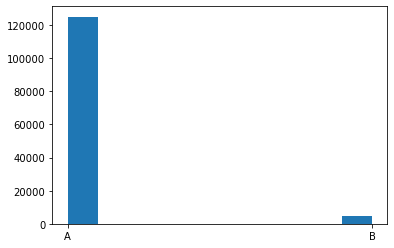

In [110]:
import matplotlib.pyplot as plt
import datetime
import numpy as np

x = data['purchase_TF']
y = data['Variant']

plt.hist(y)
plt.show()